# Stock Market Price Prediction - Linear Regression 
*   Author: Sanjay S Rao
*   LinkedIn: https://www.linkedin.com/in/sanjay-srinivasa-rao-b67a771a0/
*   e-mail - sanjay.s.rao04@gmail.com

## Problem Statement
Choose any `Stocks` data and perform simple linear and multiple linear regression in order to predict the opening price.

In [1]:
!pip3 install quandl

In [2]:
import numpy as np
import pandas as pd
import quandl
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [3]:
# Configure Quandl
quandl.ApiConfig.api_key = "cUt2SHx4otCuCSR2StVs"

## Get Data

[QuandlAPI](https://github.com/quandl/quandl-python) is a platform that provides its users with economic, financial and alternative datasets.

Follow the [article](https://algotrading101.com/learn/quandl-guide/) to get started with Quandl API. 

In [4]:
# Set start and end date for stock prices
start_date = datetime.date(2009, 3,8)
end_date = datetime.date.today()
# Load data from Quandl
data = quandl.get('FSE/SAP_X', start_date=start_date, end_date=end_date)
# Save data to CSV file
data.to_csv('./sap_stock.csv')

In [5]:
data.head()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
Date,,,,,,,,,,
2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,None,None,NaN
2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,None,None,NaN
2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,None,None,NaN
2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,None,None,NaN
2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,None,None,NaN


In [6]:
# Get descriptive statistics summary of data set 
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Daily Turnover
count,2648.000000,2981.000000,2981.000000,2988.000000,11.000000,2.942000e+03,2.935000e+03,7.0
mean,65.991424,69.757746,68.509819,69.079700,-0.070000,3.158713e+06,1.953571e+08,0.0
std,28.013445,28.198972,27.681073,27.983287,0.709761,2.026167e+06,1.205243e+08,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,7.936064e+04,0.0
25%,43.492500,45.800000,44.760000,44.970000,-0.500000,2.027710e+06,1.314660e+08,0.0
50%,58.735000,61.500000,60.640000,61.000000,-0.290000,2.711029e+06,1.711970e+08,0.0
75%,82.350000,92.240000,90.620000,91.422500,0.085000,3.767555e+06,2.263262e+08,0.0
max,142.800000,143.240000,141.080000,142.340000,1.250000,3.645671e+07,1.376505e+09,0.0


In [7]:
# Display features in data set
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover',
       'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'],
      dtype='object')

### Select Subset with relevant features

We use the daily closing price **Close** as the value to predict, so we can discard the other features.  

* 'Close' column has numerical data type
* The 'Date' is the index column and contains datetime values

In [8]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['Close'])

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()

In [9]:
df.head()

,Date,Close
0,2009-03-09,25.59
1,2009-03-10,26.87
2,2009-03-11,26.64
3,2009-03-12,26.18
4,2009-03-13,25.73


In [10]:
# Check for missing values in the columns
df.isna().values.any()

False

## Explore the Data

When we take a look at the price movement over time by simply plotting the *Closing price* vs *Time*, we can already see, that the price continously increases over time and we can also estimate that trend could be linear.

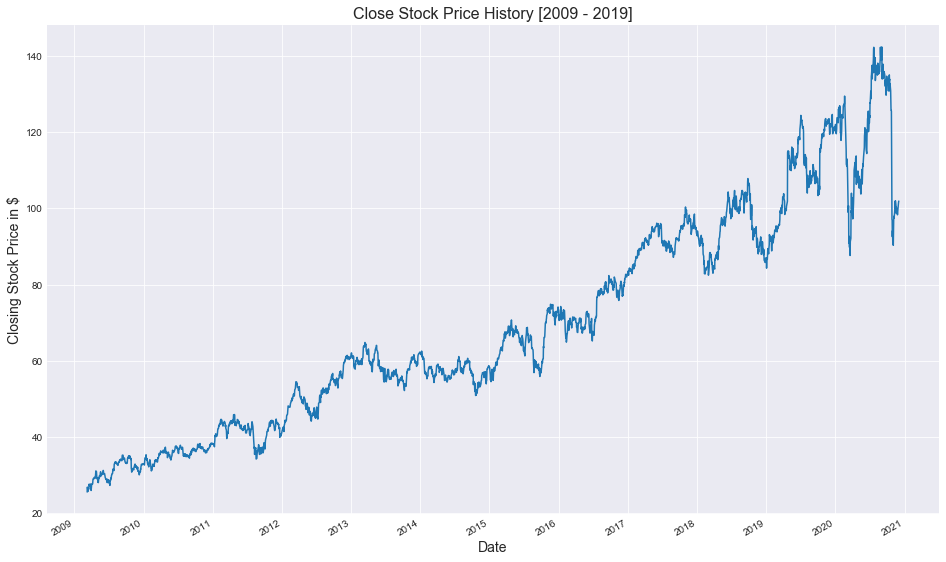

In [11]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2009 - 2019]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

## Training a Linear Regression Model

In [12]:
# train-test split
from sklearn.model_selection import train_test_split

# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

In [13]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [14]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.03133810914042769
Intercept:  22.33368239425642


<ipython-input-14-f46d15fbfb1c>:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Slope: ', np.asscalar(np.squeeze(model.coef_)))


Interpreting the coefficients:

* The **slope** coefficient tells us that with a 1 unit increase in **date** the **closing price** increases by 0.0312 $
* The **intercept** coefficient is the price at wich the **closing price** measurement started, the stock price value at date zero

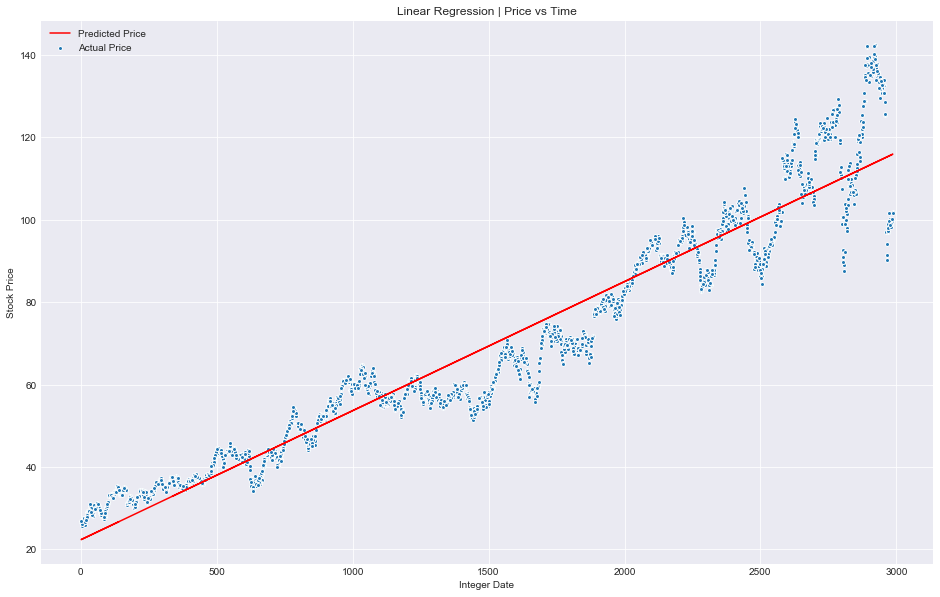

In [15]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Prediction from our Model

In [16]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [17]:
# Generate array with predicted values
y_pred = model.predict(X_test)

In [18]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [19]:
df.head()

,Date,Close,Prediction
0,2009-03-09,25.59,22.333682
1,2009-03-10,26.87,22.365021
2,2009-03-11,26.64,22.396359
3,2009-03-12,26.18,22.427697
4,2009-03-13,25.73,22.459035


In [20]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.8903323380432795
Mean Squared Error: 56.9203034932473
Root Mean Squared Error: 7.544554558968164


In [21]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.9214205716297253


The value of $R^2$ shows that are model accounts for nearly 92% of the differences between the actual stock prices and the predicted prices. 